## Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of
marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your
team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will
design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your
recommendations, so they must be backed up with compelling data insights and professional data visualizations.
## Characters and teams
* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart
by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use
the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each
day.
* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and
initiatives to promote the bike-share program. These may include email, social media, and other channels.
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting
data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about
Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.
## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are
geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to
any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One
2
approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and
annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who
purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing
flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to
future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good
chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have
chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do
that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual
riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

## Ask
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?
You will produce a report with the following deliverables:  
  
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## Prepare
You will use Cyclistic’s historical trip data to analyze and identify trends. Download the Cyclistic trip data [here](https://divvy-tripdata.s3.amazonaws.com/index.html). (Note: The datasets
have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate
and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this
license.) You can choose to work with an entire year of data, or just one quarter of a year. If you are working in Google Sheets, there
are some files that might be too large to view. This is public data that you can use to explore how different customer types are using
Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that
you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or
if they have purchased multiple single passes.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

all_files = glob.glob(os.path.join("/kaggle/input/capstone-data/*.csv"))



df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [9]:
df.shape, df.size

((5595063, 13), 72735819)

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,620BC6107255BF4C,electric_bike,2021-10-22 12:46:42,2021-10-22 12:49:50,Kingsbury St & Kinzie St,KA1503000043,NaN,NaN,41.889186,-87.638495,41.89,-87.63,member
1,4471C70731AB2E45,electric_bike,2021-10-21 09:12:37,2021-10-21 09:14:14,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.93,-87.71,member
2,26CA69D43D15EE14,electric_bike,2021-10-16 16:28:39,2021-10-16 16:36:26,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.94,-87.72,member
3,362947F0437E1514,electric_bike,2021-10-16 16:17:48,2021-10-16 16:19:03,NaN,NaN,NaN,NaN,41.920000,-87.690000,41.92,-87.69,member
4,BB731DE2F2EC51C5,electric_bike,2021-10-20 23:17:54,2021-10-20 23:26:10,NaN,NaN,NaN,NaN,41.890000,-87.710000,41.89,-87.69,member


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [12]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

## Process  
If you like, continue working with the data to better familiarize yourself and perhaps even identify new approaches to answering the
business questions. As you explore the dataset, you’ll find these columns: ride_id, rideable_type, started_at, ended_at,
start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, and member_casual.
Most of these column names are easy to read, but there are four you might not be familiar with: start_lat, start_lng, end_lat, and
end_long. These columns represent the starting and ending latitude and longitude of rides. You won’t be using the columns in your
analysis, but it’s useful to familiarize yourself with the available data!

##### Alter columns 'started_at' and 'ended_at' to datetime objects

In [13]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

##### Drop unnecessary columns

In [14]:
df = df.sort_values('started_at', ignore_index=True)
df = df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng', 'start_station_id','end_station_id', 'end_station_name'])
df.shape

(5595063, 6)

##### Drop null values

In [15]:
df = df.dropna()
df.shape

(4904254, 6)

##### Create new columns

In [16]:
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length'] = round(df.ride_length.dt.seconds/60, 2)
df['day_of_week'] = df.started_at.dt.day_name()
df['month'] = df.started_at.dt.month_name()
df['date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at'] = pd.to_datetime(df['ended_at']).dt.time
df['started_at'] = pd.to_datetime(df['started_at']).dt.time

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,member_casual,ride_length,day_of_week,month,date
1,0D139A3203274B87,classic_bike,00:02:24,00:08:39,State St & 33rd St,member,6.25,Friday,January,2021-01-01
2,C7AE8E9CDB197A8E,classic_bike,00:06:55,00:26:36,Lakeview Ave & Fullerton Pkwy,member,19.68,Friday,January,2021-01-01
3,2633EB2B8A99F5CB,electric_bike,00:12:13,00:20:06,Kedzie Ave & Milwaukee Ave,member,7.88,Friday,January,2021-01-01
4,3097EF26414C7016,classic_bike,00:12:21,00:12:33,Montrose Harbor,member,0.20,Friday,January,2021-01-01
5,938D5D1998A5470E,classic_bike,00:12:27,00:12:30,Montrose Harbor,casual,0.05,Friday,January,2021-01-01


## Analyze

##### Describe ride_length

In [17]:
df.describe()

,ride_length
count,4.904254e+06
mean,2.024483e+01
std,4.056166e+01
min,0.000000e+00
25%,6.920000e+00
50%,1.220000e+01
75%,2.213000e+01
max,1.439980e+03


In [18]:
df.groupby('member_casual').agg({'ride_id': 'count'})

,ride_id
member_casual,
casual,2211319
member,2692935


In [19]:
df.groupby('member_casual').agg({'ride_length': 'min'})

,ride_length
member_casual,
casual,0.0
member,0.0


In [20]:
df.groupby('member_casual').agg({'ride_length': 'mean'})

,ride_length
member_casual,
casual,28.470594
member,13.490205


In [21]:
df.groupby('member_casual').agg({'ride_length': 'median'})

,ride_length
member_casual,
casual,16.48
member,9.72


In [22]:
df.groupby('member_casual').agg({'ride_length': 'max'})

,ride_length
member_casual,
casual,1439.98
member,1439.98


In [23]:
df.groupby('member_casual').agg({'ride_length': 'sum'})

,ride_length
member_casual,
casual,62957564.88
member,36328245.28


In [24]:
df.groupby(['member_casual', 'day_of_week']).agg({'ride_id': 'count'})

ride_id
member_casual day_of_week         
casual        Friday        314866
              Monday        248232
              Saturday      499095
              Sunday        430274
              Thursday      245095
              Tuesday       234954
              Wednesday     238803
member        Friday        389488
              Monday        366336
              Saturday      379506
              Sunday        329961
              Thursday      396137
              Tuesday       410610
              Wednesday     420897

In [25]:
df.groupby(['member_casual', 'day_of_week']).agg({'ride_length': 'mean'})

ride_length
member_casual day_of_week             
casual        Friday         26.458420
              Monday         28.911247
              Saturday       30.752378
              Sunday         32.878563
              Thursday       24.407616
              Tuesday        25.933683
              Wednesday      24.620526
member        Friday         13.129260
              Monday         13.091331
              Saturday       15.096162
              Sunday         15.494176
              Thursday       12.614579
              Tuesday        12.646247
              Wednesday      12.799795

In [26]:
df.groupby(['member_casual', 'month']).agg({'ride_id': 'count'})

ride_id
member_casual month             
casual        April       126181
              August      365386
              December     52916
              February      9219
              January      15916
              July        394472
              June        327834
              March        78868
              May         231178
              November     81878
              October     211309
              September   316162
member        April       184993
              August      350508
              December    143561
              February     36357
              January      72293
              July        340675
              June        321668
              March       134780
              May         246711
              November    202810
              October     311707
              September   346872

In [27]:
df.groupby(['member_casual', 'month']).agg({'ride_length': 'mean'})

ride_length
member_casual month                 
casual        April        32.630473
              August       27.311381
              December     20.154787
              February     33.445941
              January      22.784512
              July         28.744951
              June         31.106922
              March        32.957381
              May          33.519652
              November     20.825568
              October      24.629241
              September    26.343222
member        April        14.544555
              August       13.814235
              December     10.904728
              February     16.073705
              January      12.814638
              July         14.028708
              June         14.416810
              March        13.892713
              May          14.557884
              November     11.422795
              October      12.295817
              September    13.518689

## Share
Now that you have performed your analysis and gained some insights into your data, create visualizations to share your findings.
Moreno has reminded you that they should be sophisticated and polished in order to effectively communicate to the executive
team. 

In [28]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

dow_count = {}
dow_length = {}
mon_count = {}
mon_length = {}

dow_count['members'] = df.query("member_casual == 'member'").groupby(['day_of_week']).agg('ride_id').count().reindex(days)
dow_count['casual'] = df.query("member_casual == 'casual'").groupby(['day_of_week']).agg('ride_id').count().reindex(days)

dow_length['members'] = df.query("member_casual == 'member'").groupby(['day_of_week']).agg('ride_length').mean().reindex(days)
dow_length['casual'] = df.query("member_casual == 'casual'").groupby(['day_of_week']).agg('ride_length').mean().reindex(days)

mon_count['members'] = df.query("member_casual == 'member'").groupby(['month']).agg('ride_id').count().reindex(months)
mon_count['casual'] = df.query("member_casual == 'casual'").groupby(['month']).agg('ride_id').count().reindex(months)

mon_length['members'] = df.query("member_casual == 'member'").groupby(['month']).agg('ride_length').mean().reindex(months)
mon_length['casual'] = df.query("member_casual == 'casual'").groupby(['month']).agg('ride_length').mean().reindex(months)

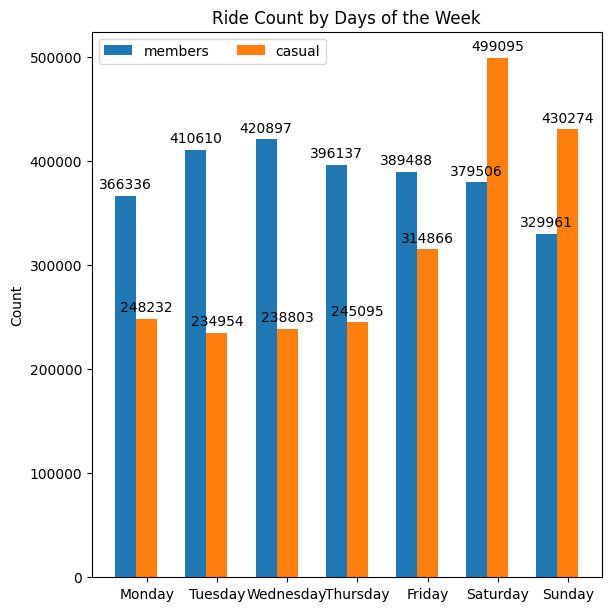

In [29]:
fig, ax = plt.subplots(figsize=(6,6),layout='constrained')

x = np.arange(len(days))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

for attribute, measurement in dow_count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Ride Count by Days of the Week')
ax.set_xticks(x + width, days)
ax.legend(loc='upper left', ncols=2)

plt.show()

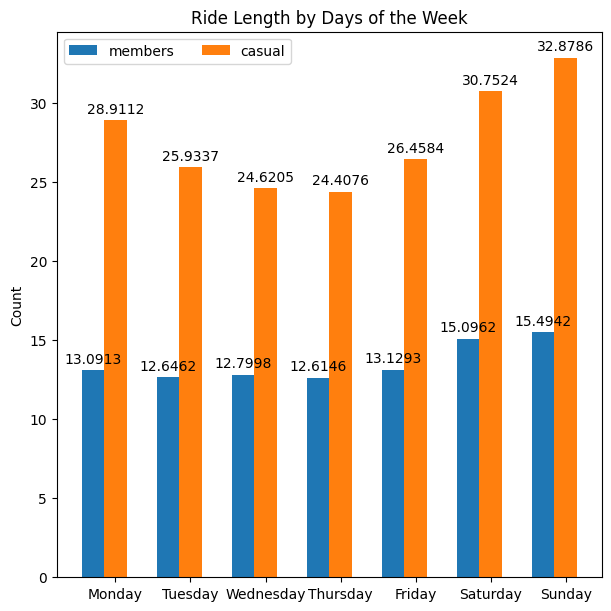

In [30]:
fig, ax = plt.subplots(figsize=(6,6),layout='constrained')

x = np.arange(len(days))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

for attribute, measurement in dow_length.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Ride Length by Days of the Week')
ax.set_xticks(x + width, days)
ax.legend(loc='upper left', ncols=2)

plt.show()

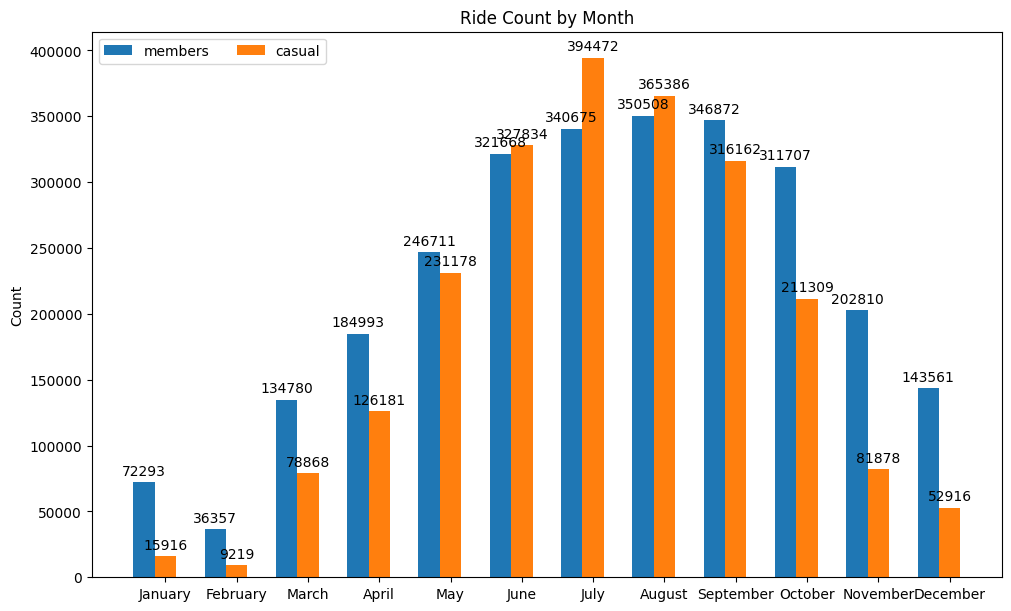

In [31]:
fig, ax = plt.subplots(figsize=(10,6),layout='constrained')

x = np.arange(len(months))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

for attribute, measurement in mon_count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Ride Count by Month')
ax.set_xticks(x + width, months)
ax.legend(loc='upper left', ncols=2)

plt.show()

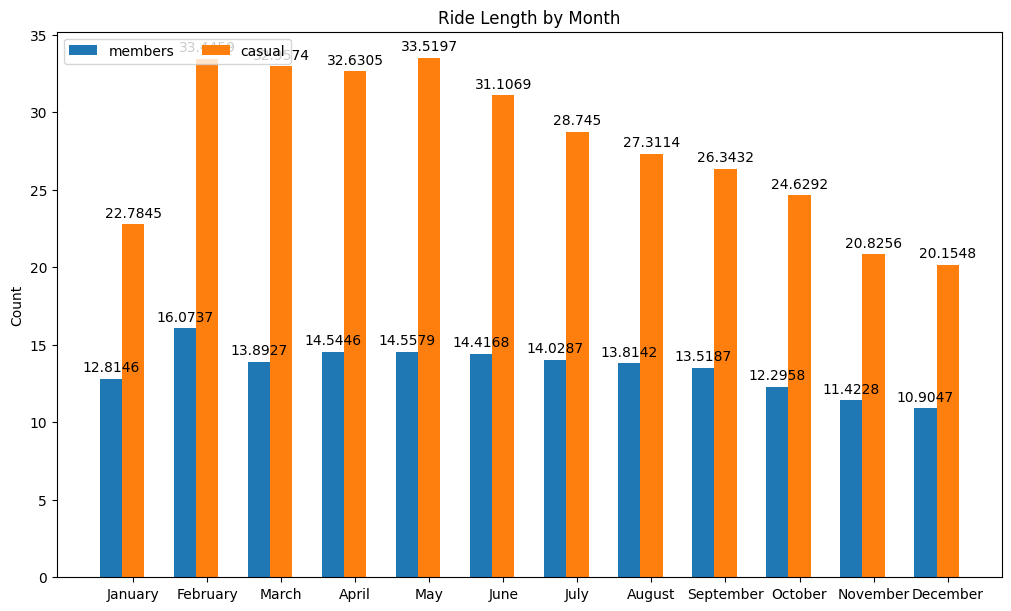

In [32]:
fig, ax = plt.subplots(figsize=(10,6),layout='constrained')

x = np.arange(len(months))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

for attribute, measurement in mon_length.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Ride Length by Month')
ax.set_xticks(x + width, months)
ax.legend(loc='upper left', ncols=2)




## Act
Now that you have finished creating your visualizations, act on your findings. Prepare the deliverables Morena asked you to create,
including the three top recommendations based on your analysis.

# What does the data tell us?

## Key points
- Casual users tended to ride more so in the warmer months of Chicago, namely June- August. Their participation exceeded that of the long term members.
- To further that the Casual demographic spent on average a lot longer time per ride than their long-term counter-parts. 
- The days of the week also further shows that causal riders prefer to use the service during the weekends as their usage peaked then. The long term members conversly utilised the service more-so throughout the typical work week i.e (Monday- friday)
- Long term riders tended to stick more so to classic bikes as opposed to the docked or electric bikes.

# Recommendations
##### This report recommends the following:
- Introducing plans thats may be more appealing to casuals for the summer months. This marketing should be done during the winter months in preperation. 
- The casual users might be more interested in a memebrship option that allows for per-use balance card. Alternatively, the existing payment structure may be altered in order to make single-use more costly to the casual riders as well as lowering the long-term membership rate.
- Membership rates specifically for the warmer months as well as for those who only ride on the weekends would assist in targeting the casual riders more specifically

# Things to Consider

## Additional points that were not examined
 The report understands the scope of this analysis is extremely limited and because of that fact, additional data, as well as data points may have been able to contribute to this report offering an even more granular analysis. The following are data points that could have enhanced the report:
 
 - Age and gender: This would add a dynamic to whether or not customers are being targeted across demograpic lines. Is the existing marketing effective? Is there potential for more inclusive targeting?
 - Pricing structure: THe actual pricing plans data was not provided and would give further insight to which plans are the most popular and by (how much) when comparing them. It would also be effective to understanding the spending behaviour of casual user.
 - Household income data: Pinpointing the average income of the long-term memebrs as compared to the casual counter-parts would allow for further analysis of what is the typical economic standing of each type of member, as well as providing the ability to analysis overall price sensitivity between the two different membership types.
 
 
### Thank you for your time!